## 필요한 라이브러리 로드

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [5]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## 데이터셋 로드

In [6]:
test = pd.read_csv("data/open/test.csv")
print(test.shape)
test.head()

(291241, 22)


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [7]:
train = pd.read_csv("data/open/train.csv")
print(train.shape)
train.head()

(4701217, 23)


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [8]:
data_info = pd.read_csv("data/open/data_info.csv")
print(data_info.shape)
data_info

(24, 2)


,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [9]:
train['base_date']= train['base_date'].astype('str')

In [10]:
test['base_date']= test['base_date'].astype('str')

In [11]:
train["year"] = pd.to_datetime(train["base_date"]).dt.year
train["month"] = pd.to_datetime(train["base_date"]).dt.month
train["day"] = pd.to_datetime(train["base_date"]).dt.day
train.head(2)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28


In [12]:
test["year"] = pd.to_datetime(test["base_date"]).dt.year
test["month"] = pd.to_datetime(test["base_date"]).dt.month
test["day"] = pd.to_datetime(test["base_date"]).dt.day
test.head(2)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,2022,8,25
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,2022,8,9


In [13]:
train["day_int"] = train['day_of_week'].map({"월":"0", '화':'1', '수':'2', '목':'3', '금':'4', '토':'5', '일':'6'})
train["day_int"] = train["day_int"].astype(int)

In [14]:
test["day_int"] = test['day_of_week'].map({"월":"0", '화':'1', '수':'2', '목':'3', '금':'4', '토':'5', '일':'6'})
test["day_int"] = test["day_int"].astype(int)

In [15]:
train["start_turn_restricted"] = train["start_turn_restricted"].astype('bool')

In [16]:
train["end_turn_restricted"] = train["end_turn_restricted"].astype('bool')

In [17]:
test["start_turn_restricted"] = test["start_turn_restricted"].astype('bool')

In [18]:
test["end_turn_restricted"] = test["end_turn_restricted"].astype('bool')

In [19]:
train["weekend"] = train["day"].map(lambda x : True if x>=5 else False)

In [20]:
test["weekend"] = test["day"].map(lambda x : True if x>=5 else False)

In [21]:
train.head(2)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,day_int,weekend
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,제3교래교,33.427749,126.662335,True,52.0,2022,6,23,3,True
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,KAL사거리,33.504811,126.526240,True,30.0,2022,7,28,3,True


In [22]:
set(train.columns) - set(test.columns)

{'target'}

## info

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              object 
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  bool   
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    bool   
 22  target            

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  object 
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

In [25]:
test.describe()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,day_int
count,291241.000000,291241.000000,291241.000000,291241.0,291241.0,291241.000000,291241.0,291241.000000,291241.0,291241.000000,291241.000000,291241.000000,291241.000000,291241.000000,291241.0,291241.0,291241.000000,291241.000000
mean,11.856854,2.021371,105.245948,0.0,0.0,58.771430,0.0,3651.902033,0.0,0.634845,33.361624,126.512946,33.361651,126.512919,2022.0,8.0,16.125546,2.803771
std,6.803378,0.750898,1.862653,0.0,0.0,11.390743,0.0,11327.618389,0.0,1.225362,0.116064,0.061478,0.116067,0.061344,0.0,0.0,8.886111,1.999539
min,0.000000,1.000000,103.000000,0.0,0.0,30.000000,0.0,0.000000,0.0,0.000000,33.243432,126.303780,33.243432,126.303780,2022.0,8.0,1.000000,0.000000
25%,6.000000,1.000000,103.000000,0.0,0.0,50.000000,0.0,0.000000,0.0,0.000000,33.254214,126.476508,33.254214,126.476508,2022.0,8.0,9.000000,1.000000
50%,12.000000,2.000000,106.000000,0.0,0.0,60.000000,0.0,0.000000,0.0,0.000000,33.272222,126.512046,33.272222,126.512046,2022.0,8.0,16.000000,3.000000
75%,18.000000,3.000000,107.000000,0.0,0.0,70.000000,0.0,0.000000,0.0,0.000000,33.492718,126.561830,33.492718,126.561830,2022.0,8.0,24.000000,5.000000
max,23.000000,3.000000,107.000000,0.0,0.0,80.000000,0.0,50000.000000,0.0,3.000000,33.521399,126.912948,33.521399,126.912948,2022.0,8.0,31.000000,6.000000


In [26]:
train.describe()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,year,month,day,day_int
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01,2.021607e+03,6.299853e+00,1.508051e+01,3.012538e+00
std,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01,4.883579e-01,3.772046e+00,9.056714e+00,1.994704e+00
min,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01,2.021000e+03,3.000000e+00,7.000000e+00,1.000000e+00
50%,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01,2.022000e+03,6.000000e+00,1.400000e+01,3.000000e+00
75%,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01,2.022000e+03,1.000000e+01,2.300000e+01,5.000000e+00
max,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02,2.022000e+03,1.200000e+01,3.100000e+01,6.000000e+00


## histogram

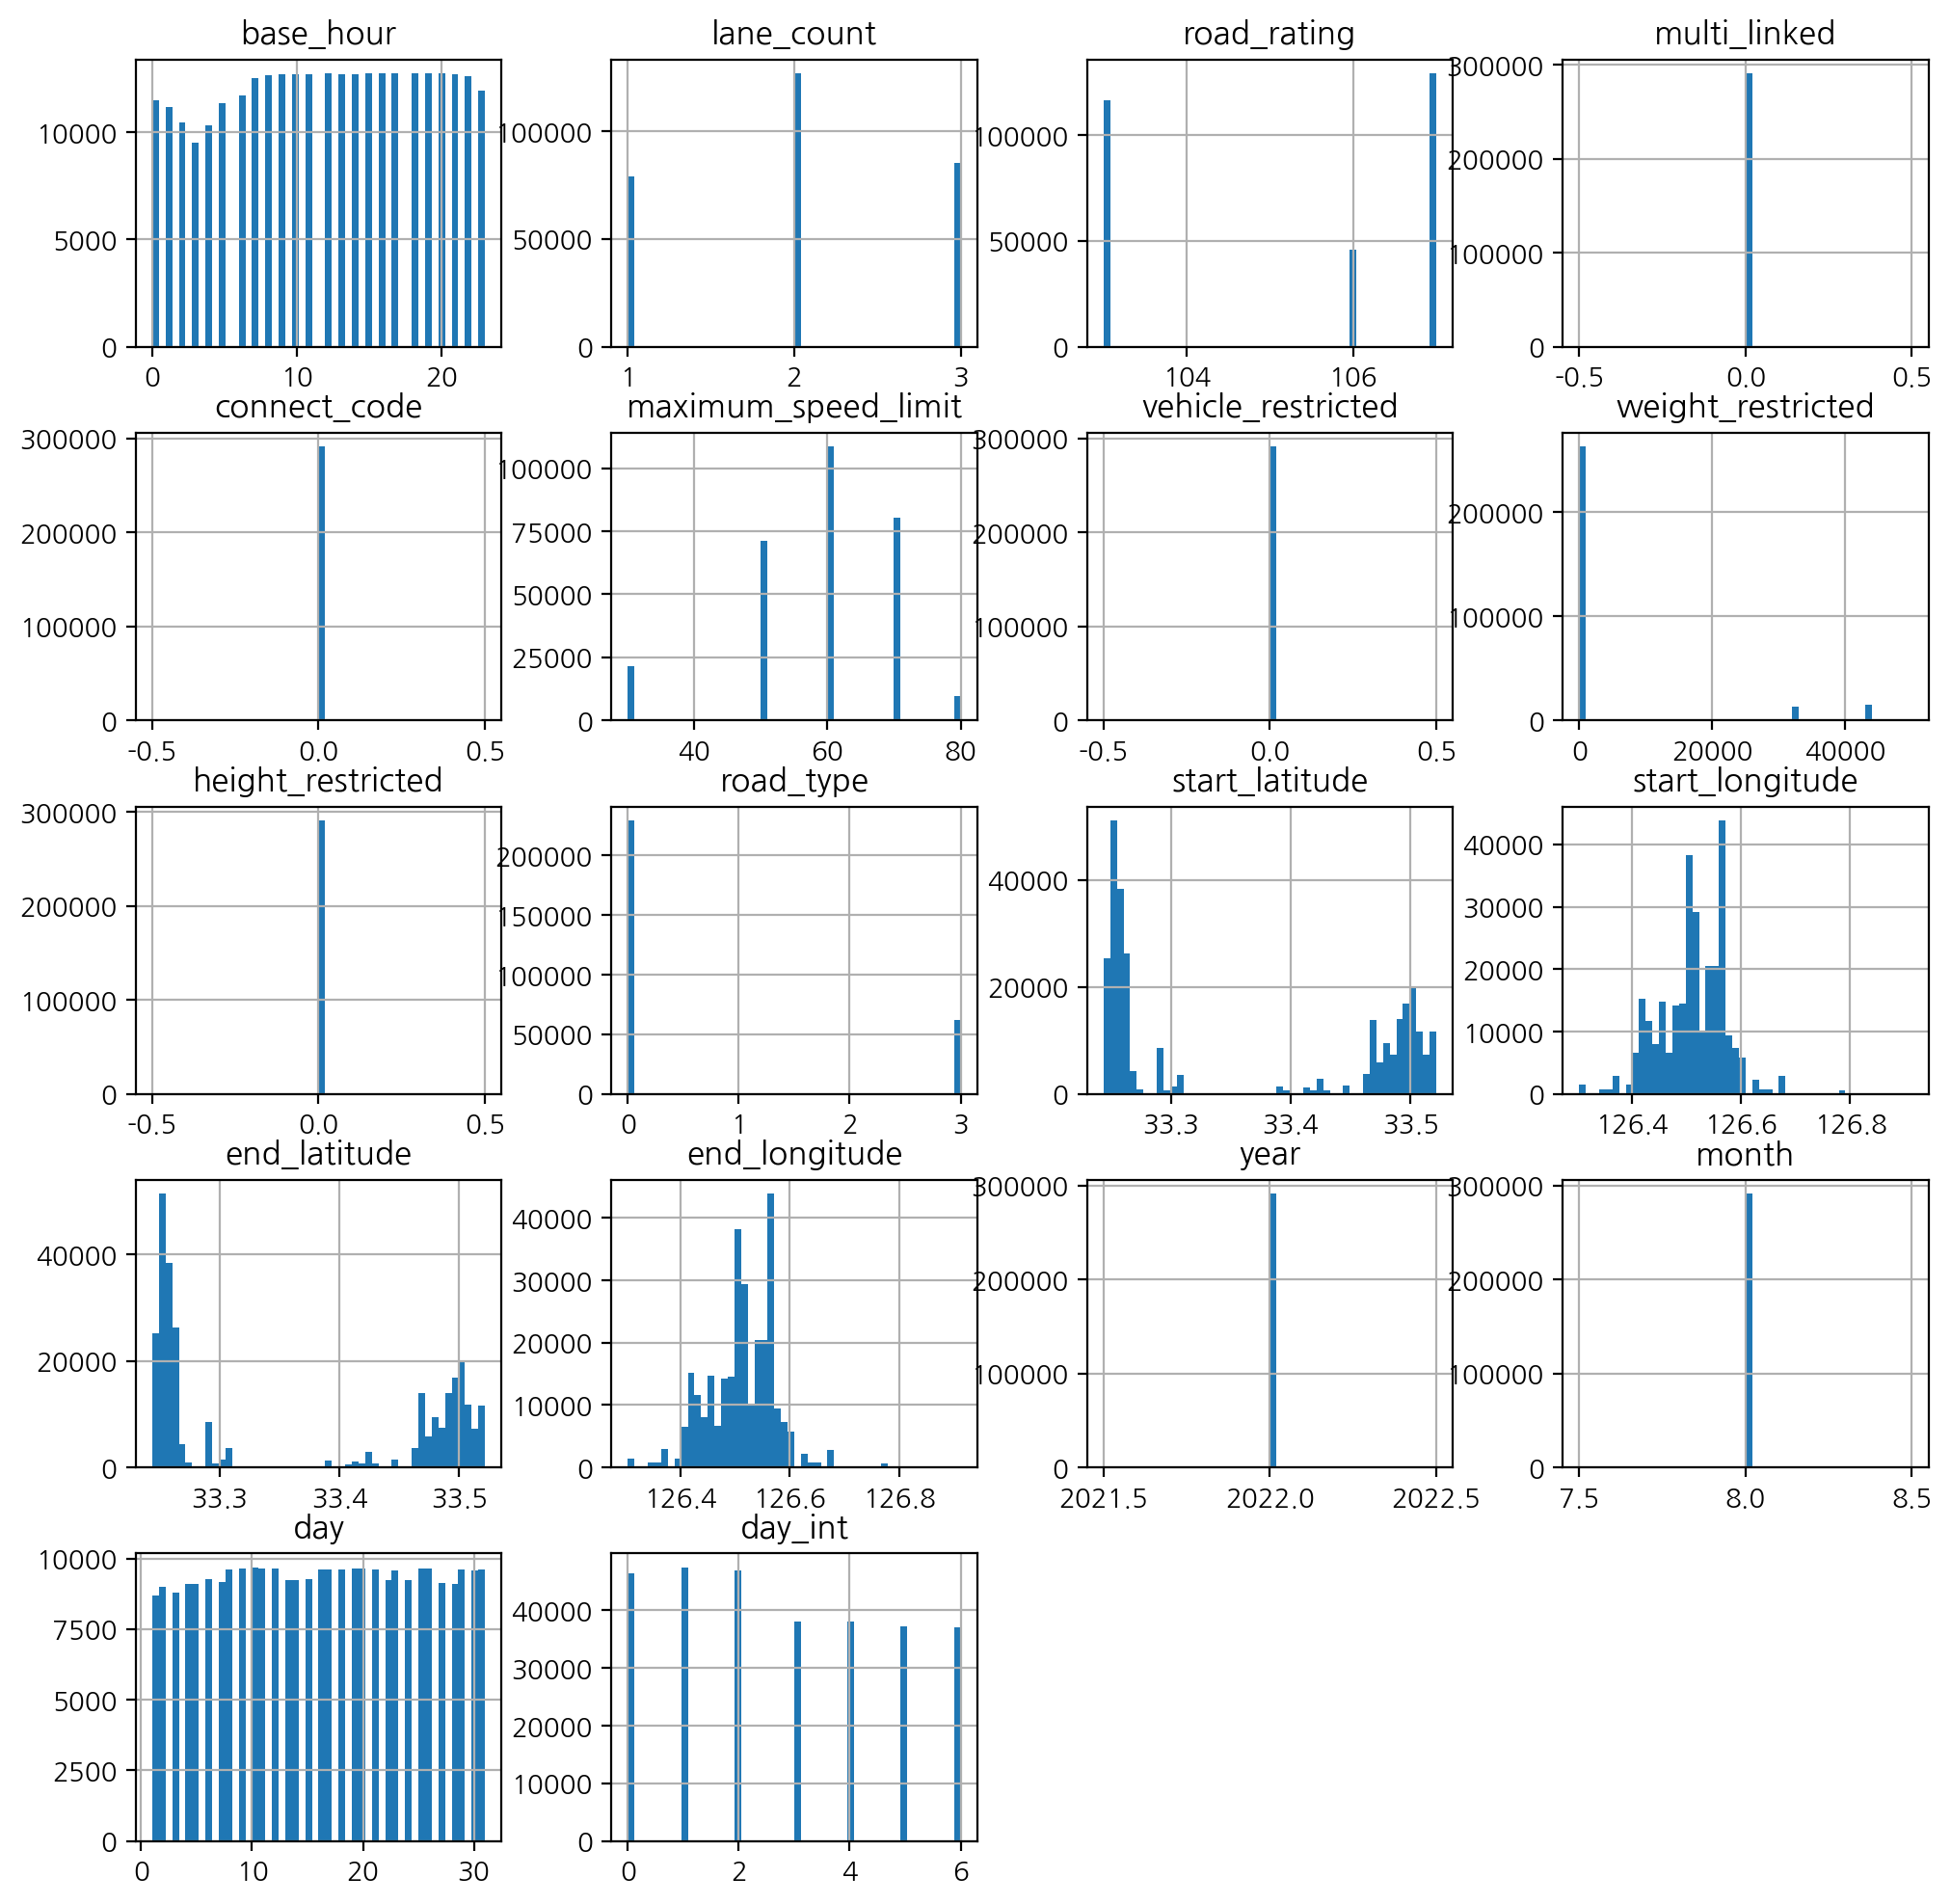

In [27]:
test.hist(figsize=(12,12), bins=50);

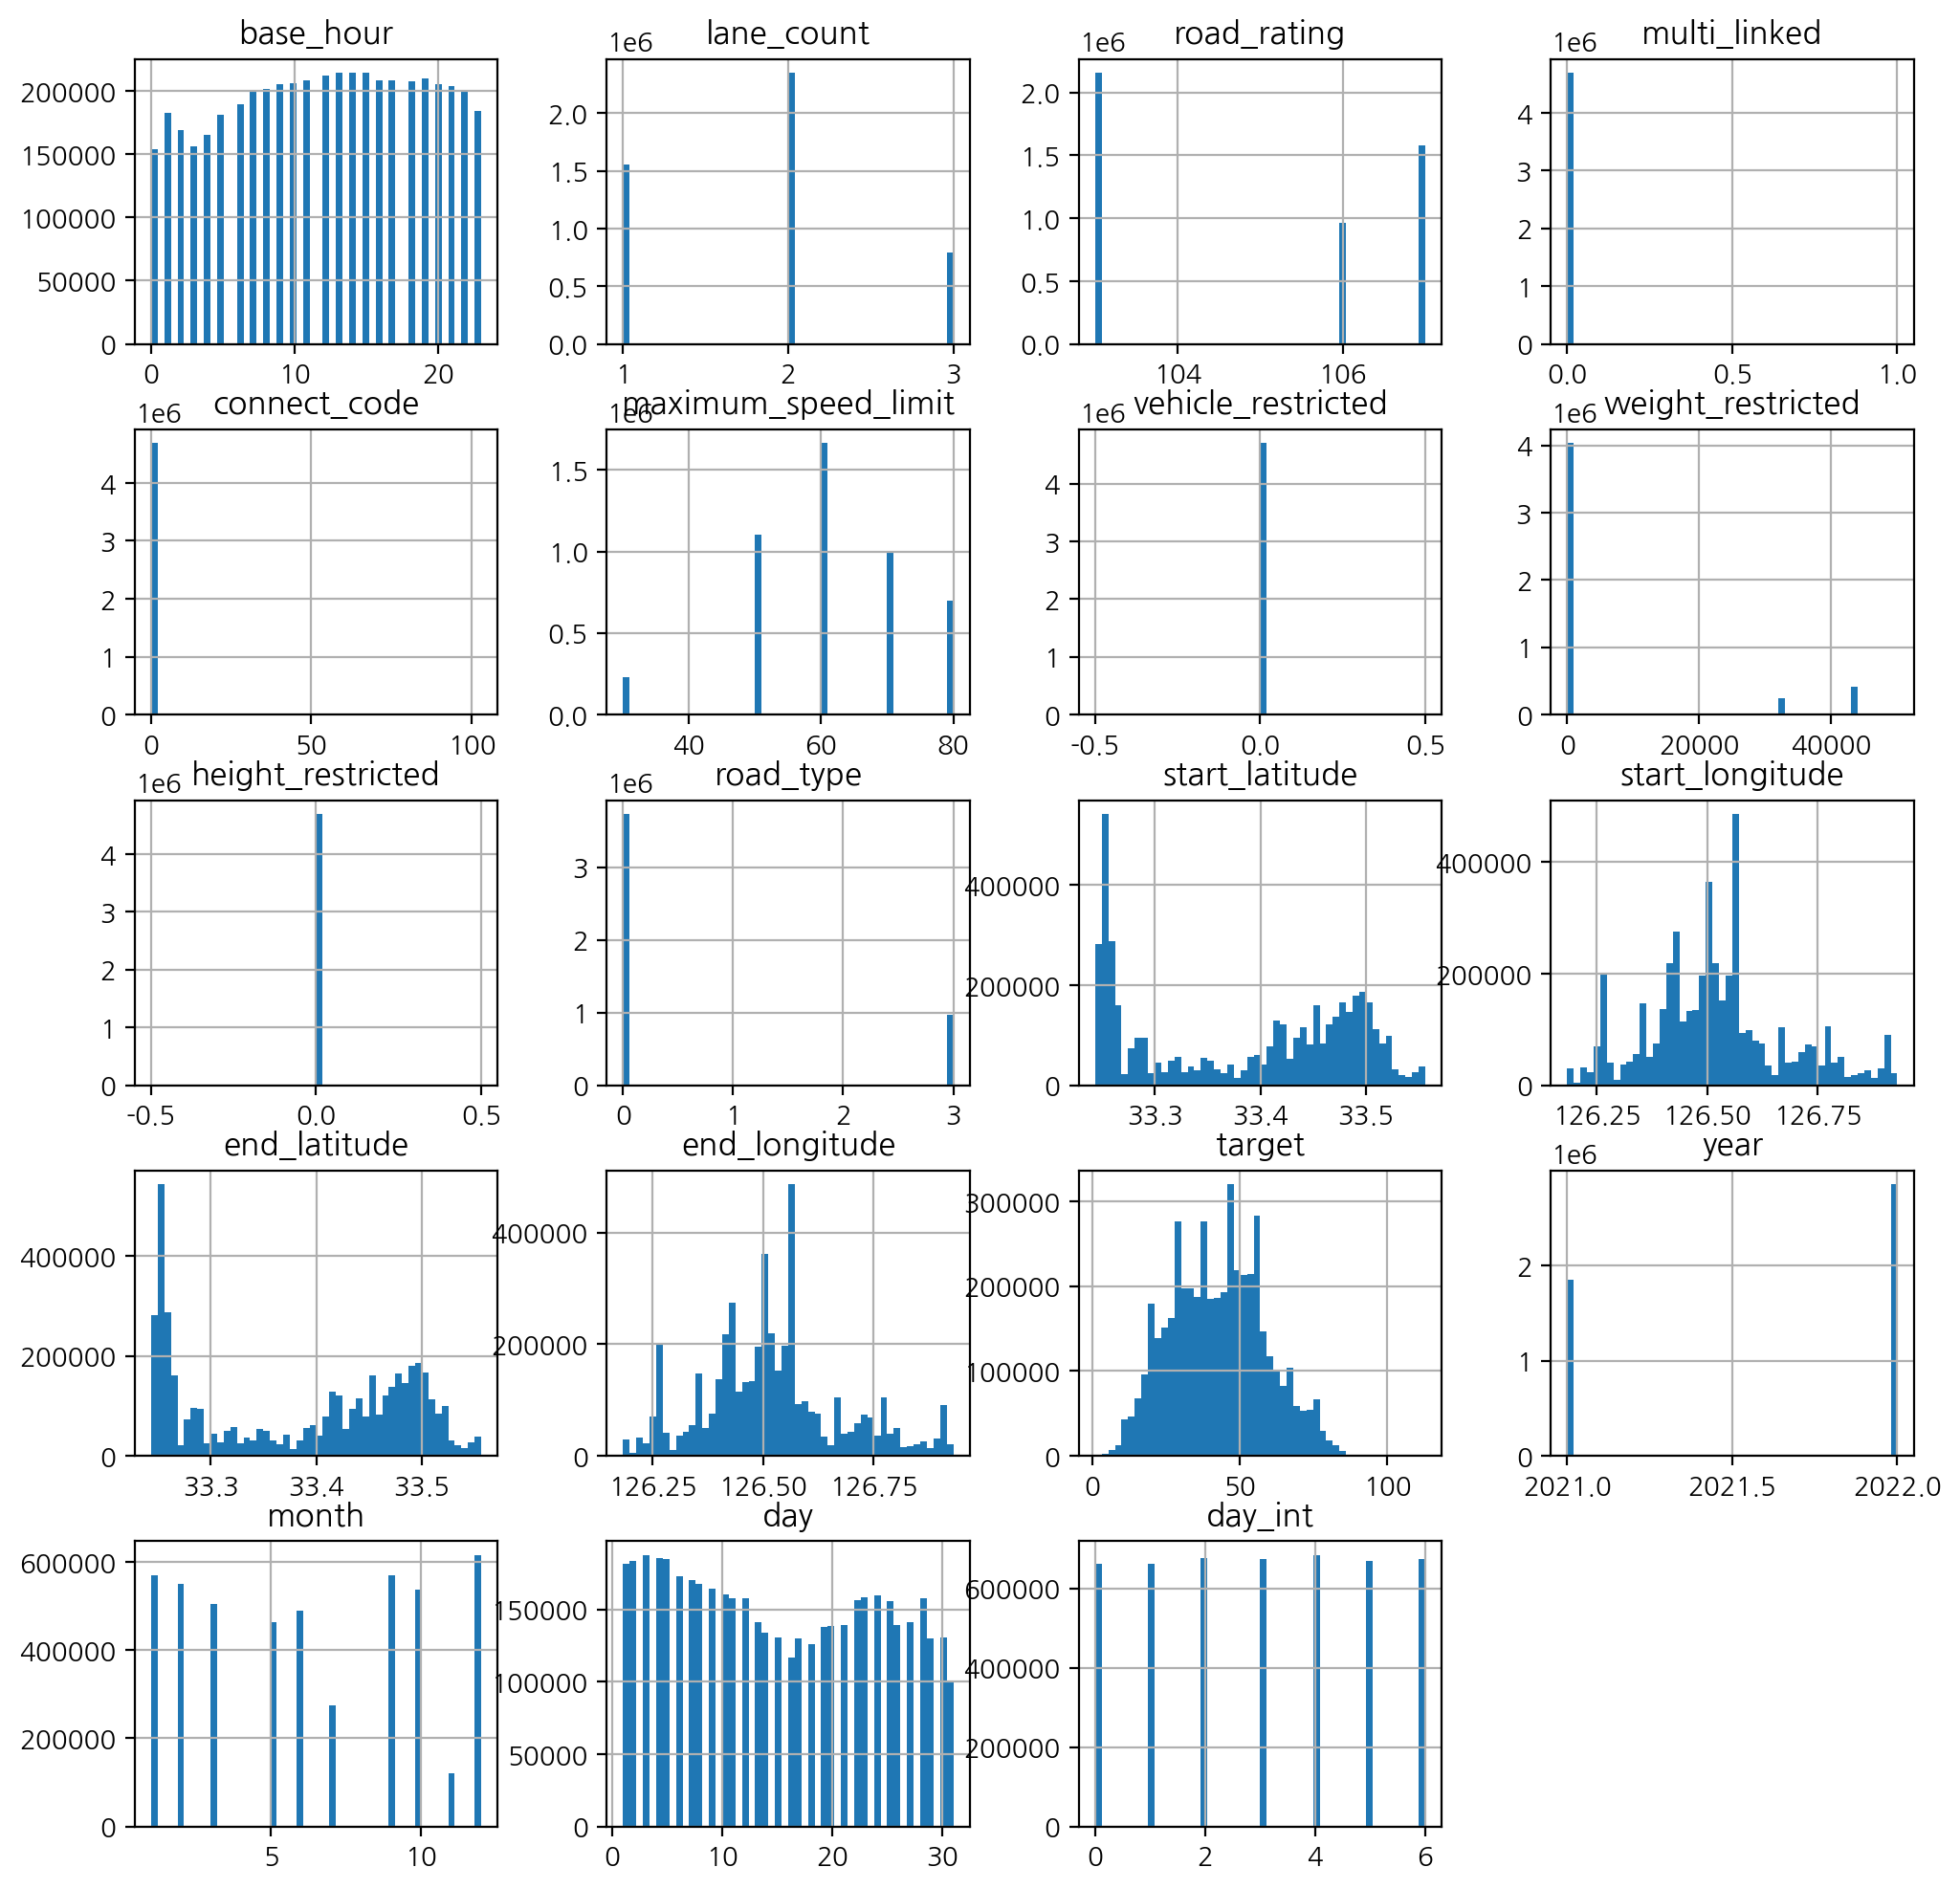

In [28]:
train.hist(figsize=(12,12), bins=50);

## 결측치

In [29]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
year                     0
month                    0
day                      0
day_int                  0
weekend                  0
dtype: int64

In [30]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
year                     0
month                    0
day                      0
day_int                  0
weekend                  0
dtype: int64

## 정답값 빈도수

In [31]:
train["target"].value_counts()

48.0     112044
49.0     110244
50.0     108822
54.0     108040
51.0     107347
          ...  
112.0         2
96.0          2
113.0         2
98.0          1
103.0         1
Name: target, Length: 102, dtype: int64

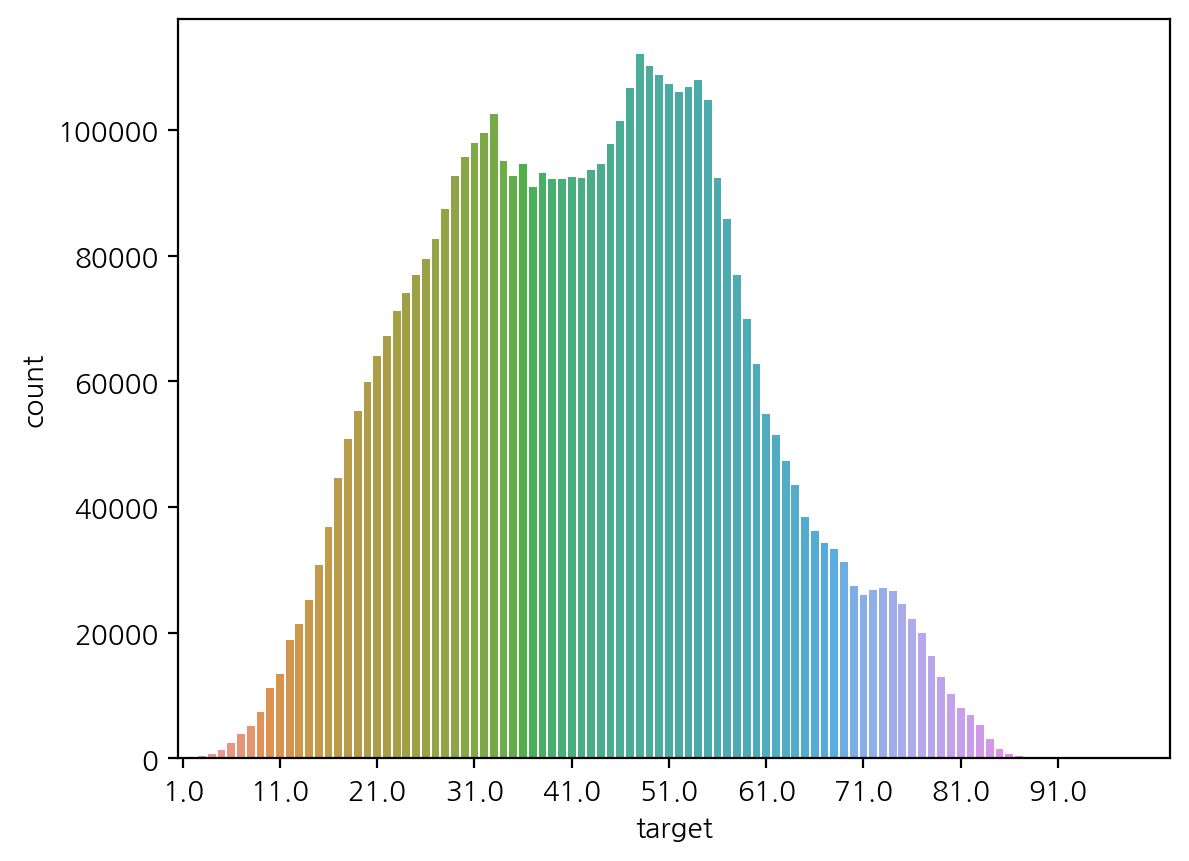

In [32]:
plot = sns.countplot(x=train["target"])
plot.set_xticks(range(0,100,10));

<AxesSubplot:>

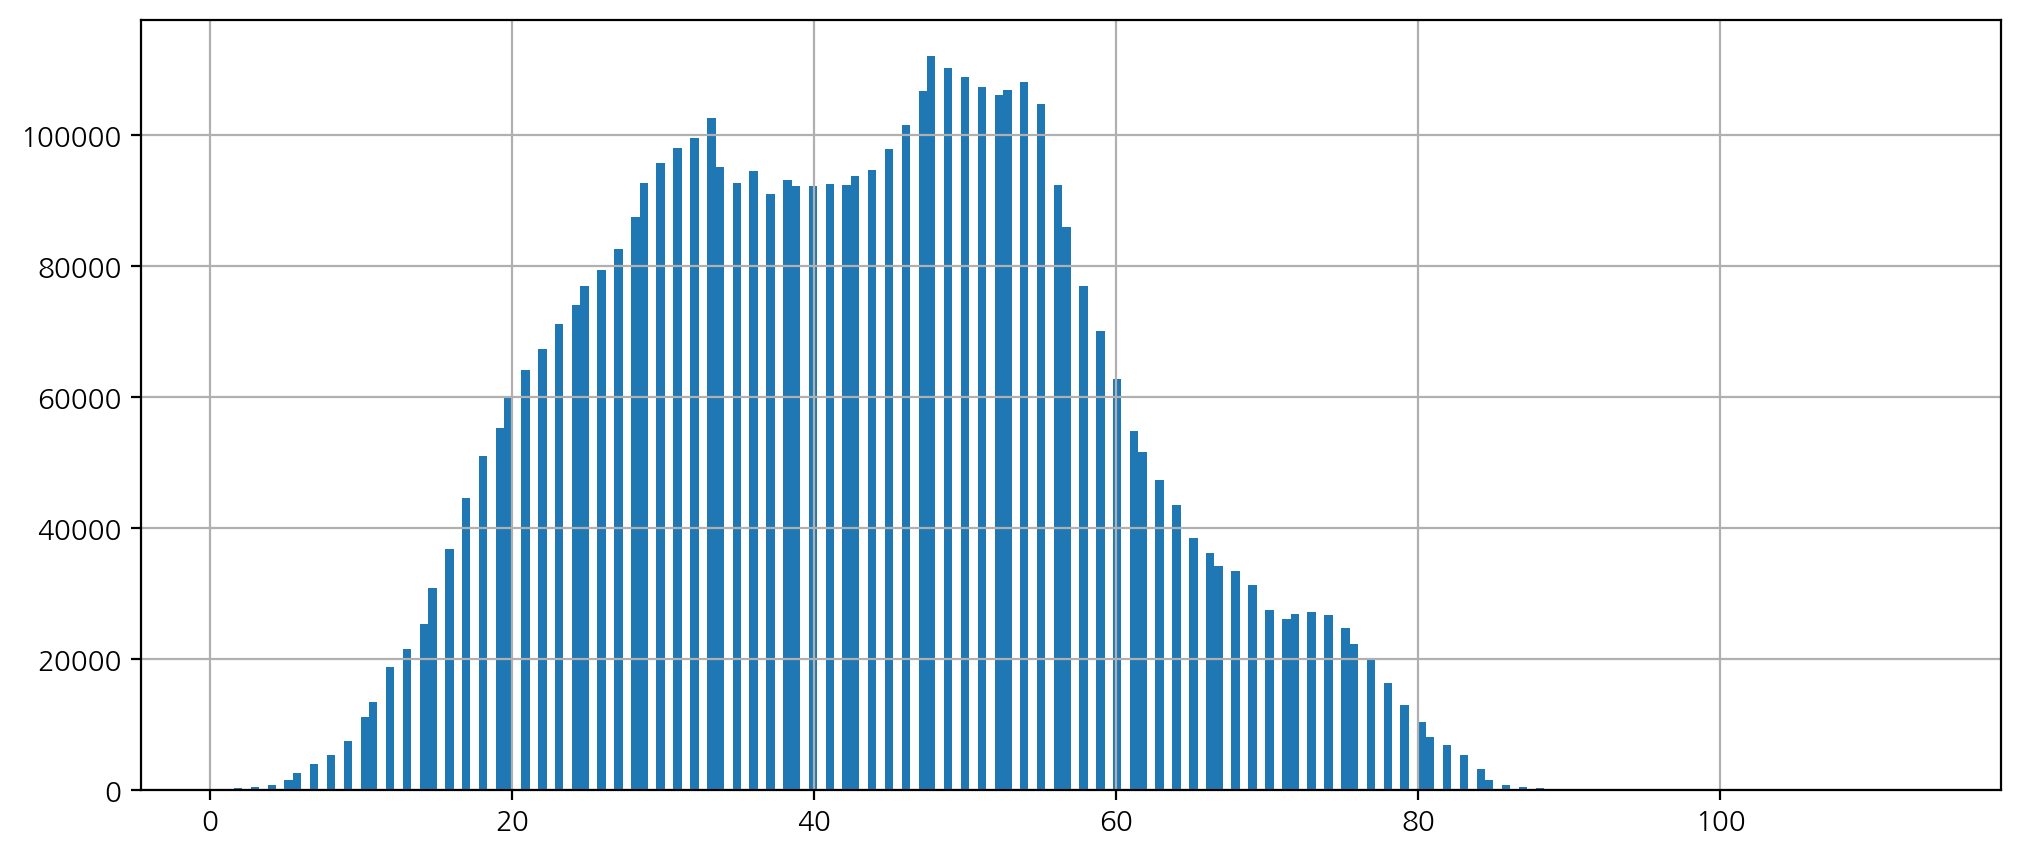

In [33]:
train["target"].hist(bins = 200, figsize = (12, 5))

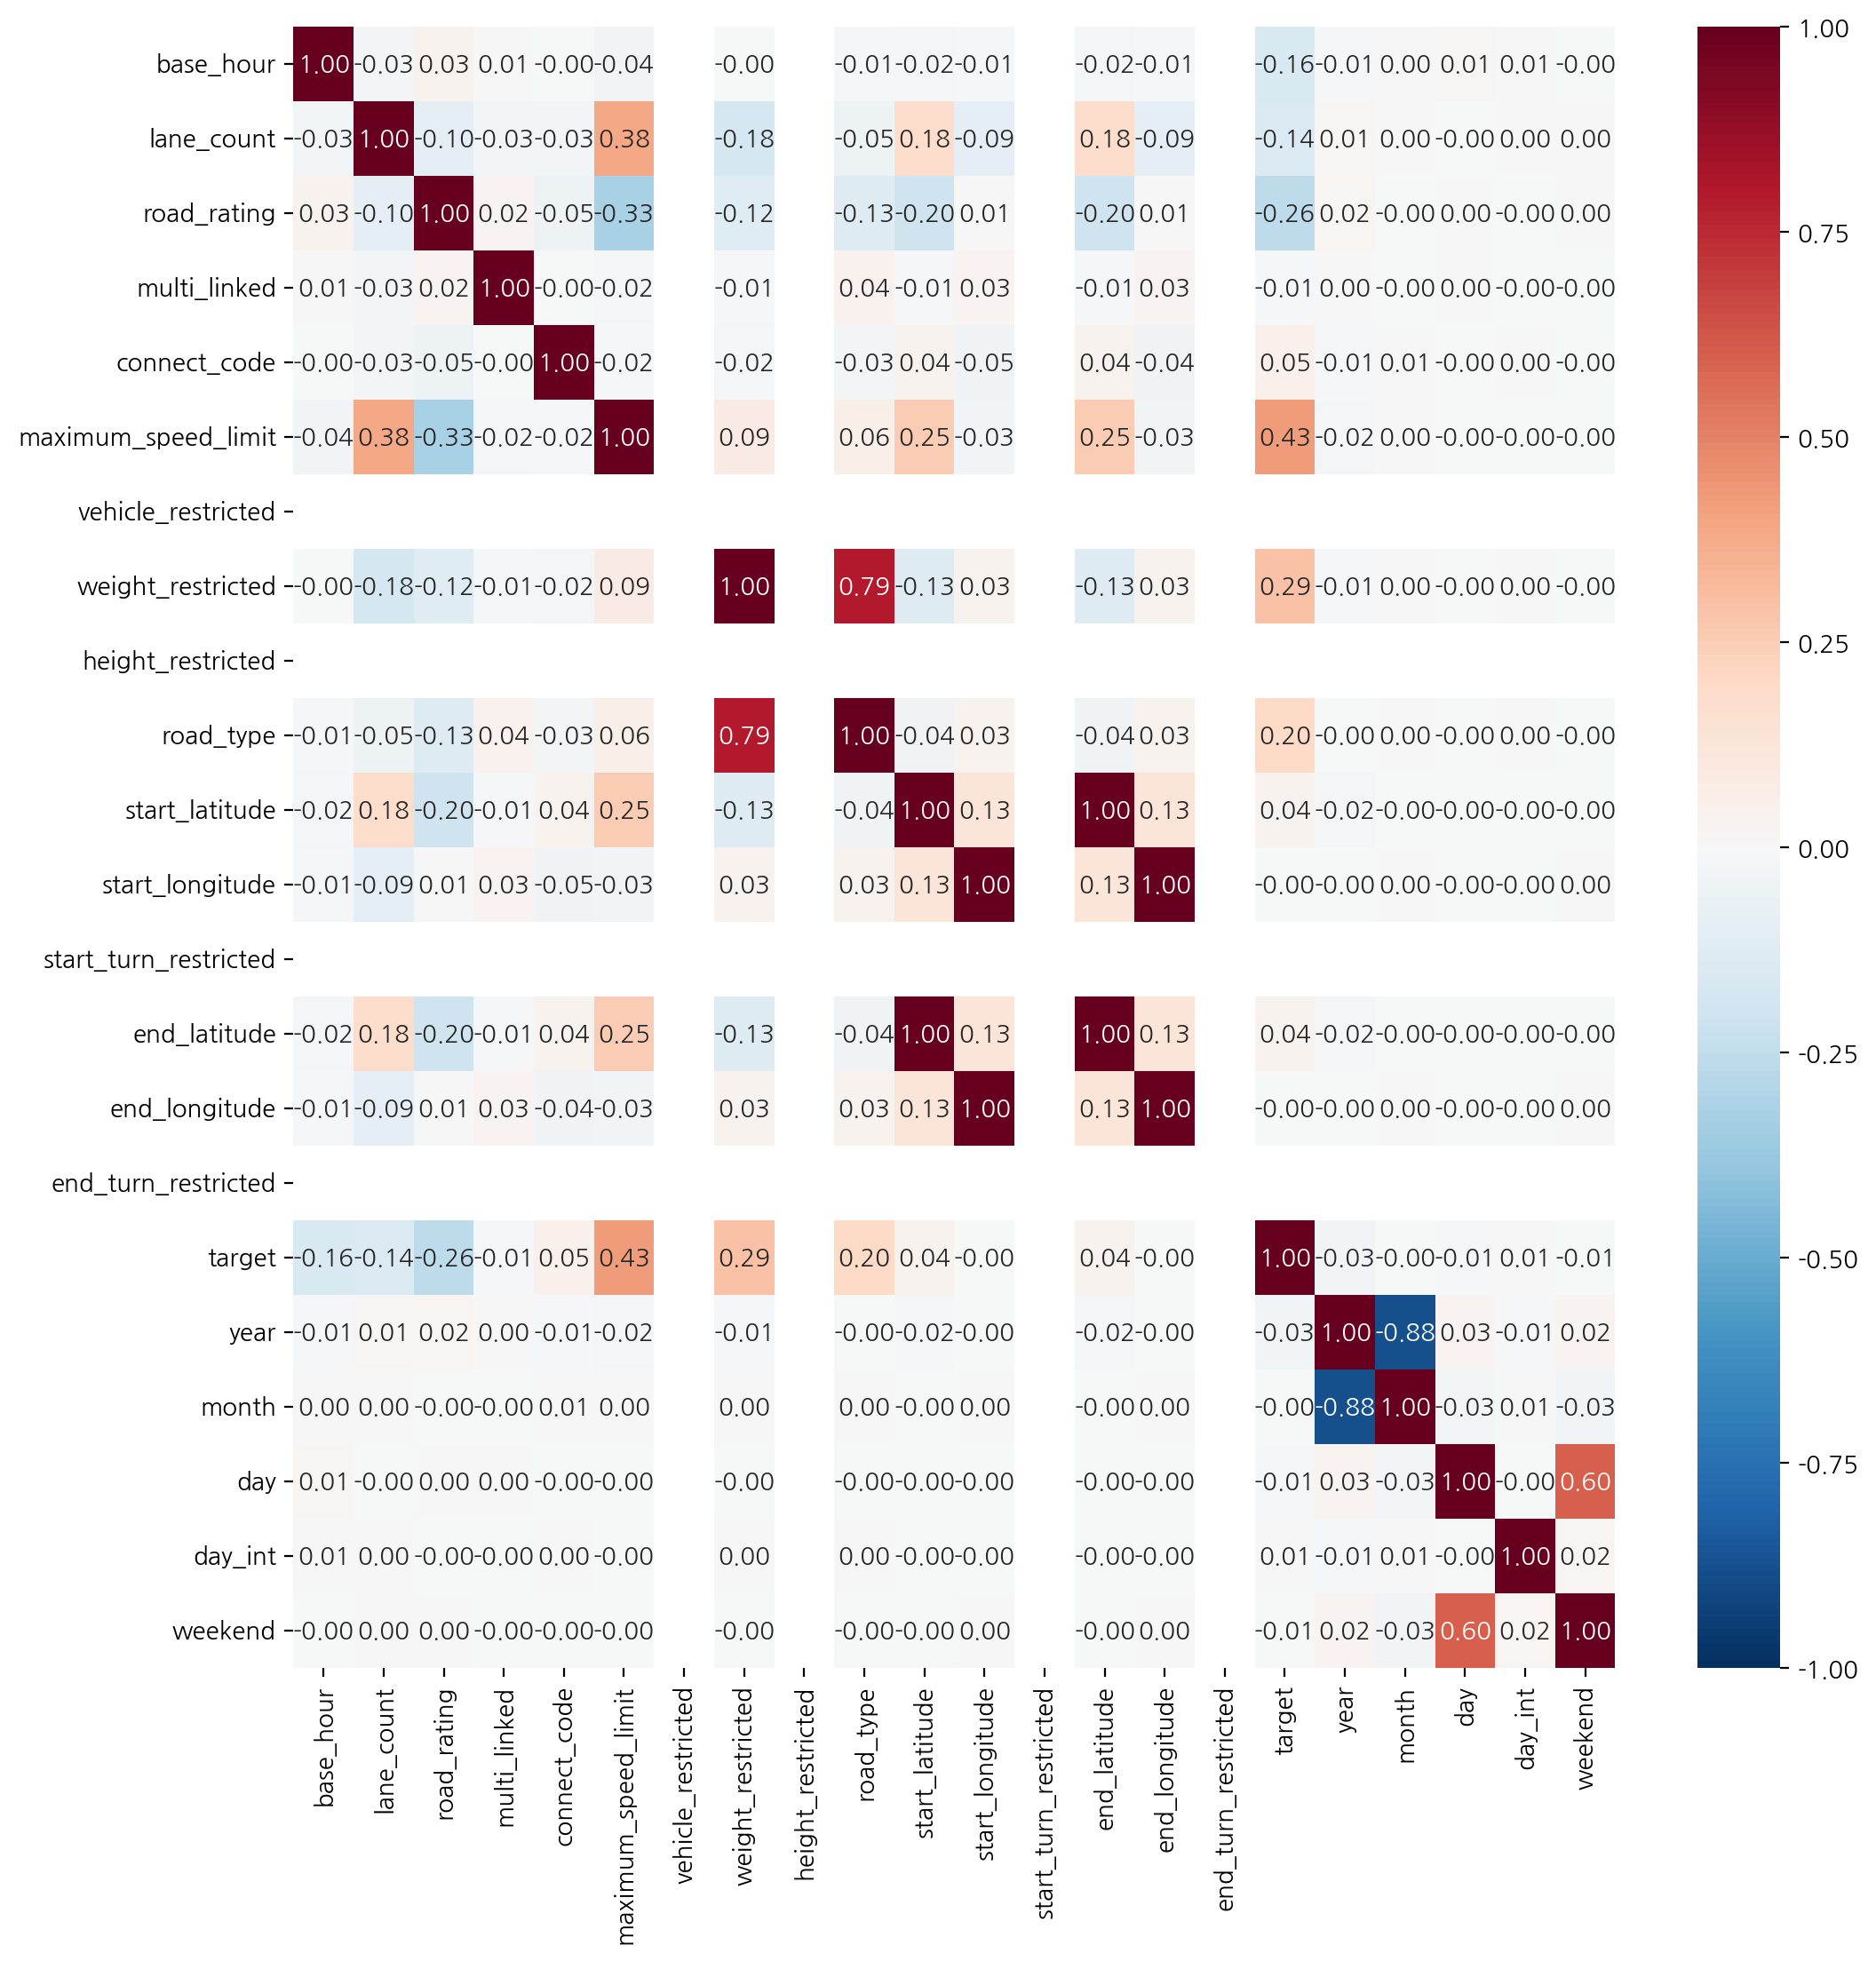

In [34]:
# target은 최고속도제한과 높은 상관을 보임
plt.figure(figsize= (12 ,12))
_=sns.heatmap(data = train.corr(), annot= True, cmap = "RdBu_r", fmt = '.2f', vmax = 1, vmin = -1)

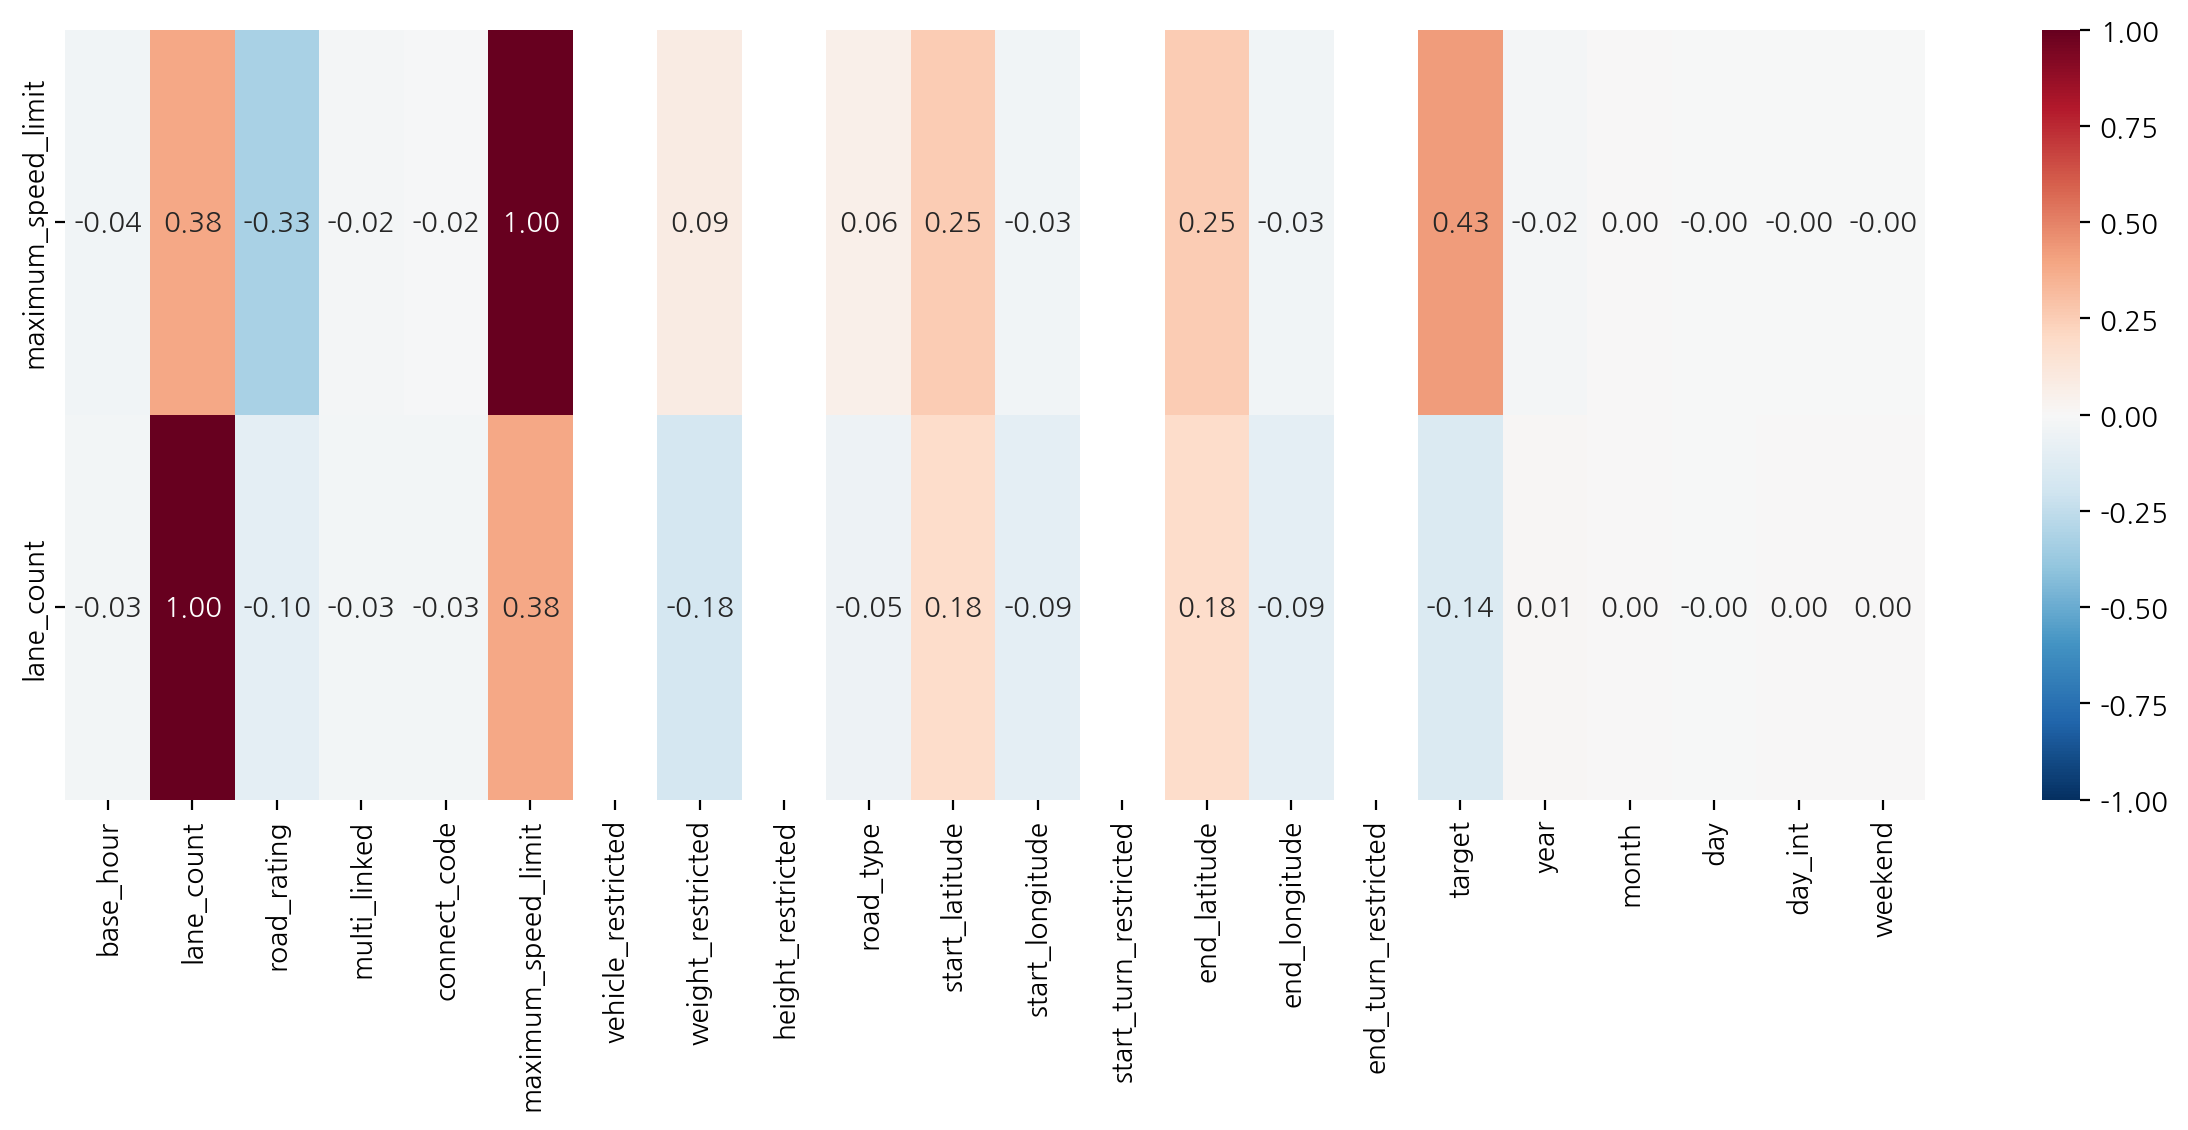

In [35]:
plt.figure(figsize = (15, 5))
_=sns.heatmap(data = train.corr()[["maximum_speed_limit", "lane_count"]].transpose(), annot= True, cmap = "RdBu_r", fmt = '.2f', vmax = 1, vmin = -1)

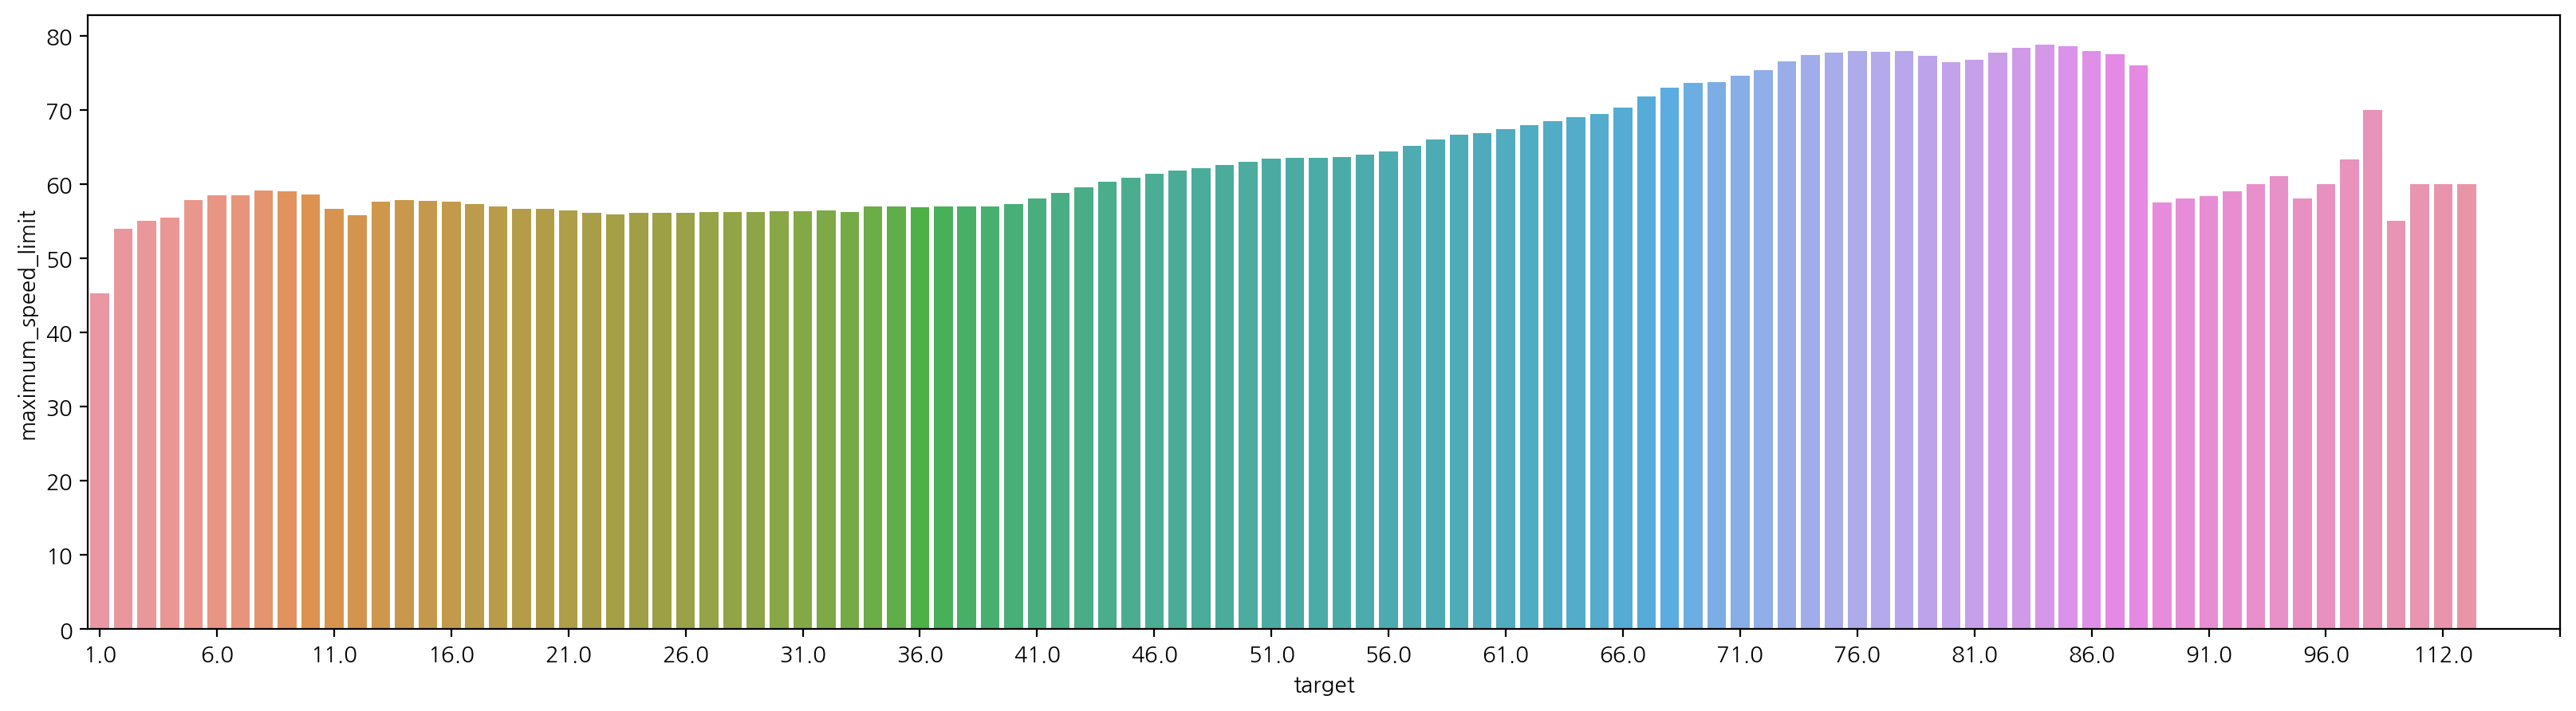

In [36]:
plt.figure(figsize = (20, 5))
plot= sns.barplot(data = train, x= "target", y = "maximum_speed_limit", ci = None)
plot.set_xticks(range(0,110,5));

In [37]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,day_int,weekend
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,제3교래교,33.427749,126.662335,True,52.0,2022,6,23,3,True
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,KAL사거리,33.504811,126.526240,True,30.0,2022,7,28,3,True
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,상창육교,33.280072,126.362147,True,61.0,2021,10,10,6,True
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,서현주택,33.245565,126.566228,True,20.0,2022,3,11,4,True
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,애월입구,33.462677,126.330152,True,38.0,2021,10,5,1,True


## 정답값이자 예측해야 될 값

In [38]:
label_name = "target"
label_name

'target'

## 학습, 예측에 사용할 컬럼

In [39]:
train.select_dtypes(include="number").columns

Index(['base_hour', 'lane_count', 'road_rating', 'multi_linked',
       'connect_code', 'maximum_speed_limit', 'vehicle_restricted',
       'weight_restricted', 'height_restricted', 'road_type', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'target', 'year',
       'month', 'day', 'day_int'],
      dtype='object')

In [40]:
train.select_dtypes(include="object").columns

Index(['id', 'base_date', 'day_of_week', 'road_name', 'start_node_name',
       'end_node_name'],
      dtype='object')

In [41]:
feature_name = ['base_hour', 'lane_count', 'road_rating', 'multi_linked',
       'connect_code', 'maximum_speed_limit',
       'weight_restricted', 'height_restricted','start_turn_restricted',
       'end_turn_restricted','road_type', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'year',
       'month', 'day', 'day_int', 'weekend']
feature_name

['base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'weight_restricted',
 'height_restricted',
 'start_turn_restricted',
 'end_turn_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'year',
 'month',
 'day',
 'day_int',
 'weekend']

In [42]:
train[feature_name]

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,day_int,weekend
0,17,1,106,0,0,60.0,32400.0,0.0,True,True,3,33.427747,126.662612,33.427749,126.662335,2022,6,23,3,True
1,21,2,103,0,0,60.0,0.0,0.0,True,True,0,33.500730,126.529107,33.504811,126.526240,2022,7,28,3,True
2,7,2,103,0,0,80.0,0.0,0.0,True,True,0,33.279145,126.368598,33.280072,126.362147,2021,10,10,6,True
3,13,2,107,0,0,50.0,0.0,0.0,True,True,0,33.246081,126.567204,33.245565,126.566228,2022,3,11,4,True
4,8,2,103,0,0,80.0,0.0,0.0,True,True,0,33.462214,126.326551,33.462677,126.330152,2021,10,5,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,True,True,0,33.422145,126.278125,33.420955,126.273750,2021,11,4,3,False
4701213,2,2,107,0,0,80.0,43200.0,0.0,True,True,3,33.472505,126.424368,33.472525,126.424890,2022,3,31,3,True
4701214,22,2,103,0,0,60.0,0.0,0.0,True,True,0,33.447183,126.912579,33.444121,126.912948,2022,6,13,0,True
4701215,2,2,103,0,0,80.0,0.0,0.0,True,True,0,33.443596,126.431817,33.444996,126.433332,2021,10,20,2,True


## 학습, 예측 데이터셋 만들기

In [43]:
X_train = train[feature_name]
print(X_train.shape)
X_train.head()

(4701217, 20)


,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,day_int,weekend
0,17,1,106,0,0,60.0,32400.0,0.0,True,True,3,33.427747,126.662612,33.427749,126.662335,2022,6,23,3,True
1,21,2,103,0,0,60.0,0.0,0.0,True,True,0,33.500730,126.529107,33.504811,126.526240,2022,7,28,3,True
2,7,2,103,0,0,80.0,0.0,0.0,True,True,0,33.279145,126.368598,33.280072,126.362147,2021,10,10,6,True
3,13,2,107,0,0,50.0,0.0,0.0,True,True,0,33.246081,126.567204,33.245565,126.566228,2022,3,11,4,True
4,8,2,103,0,0,80.0,0.0,0.0,True,True,0,33.462214,126.326551,33.462677,126.330152,2021,10,5,1,True


In [44]:
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(291241, 20)


,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,year,month,day,day_int,weekend
0,17,3,107,0,0,70.0,0.0,0.0,True,True,0,33.499427,126.541298,33.500772,126.543837,2022,8,25,3,True
1,12,2,103,0,0,70.0,0.0,0.0,True,True,3,33.258507,126.427003,33.258119,126.415840,2022,8,9,1,True
2,2,1,103,0,0,60.0,0.0,0.0,True,True,0,33.258960,126.476508,33.259206,126.474687,2022,8,5,4,True
3,23,3,103,0,0,70.0,0.0,0.0,True,True,0,33.473494,126.545647,33.471061,126.545467,2022,8,18,3,True
4,17,3,106,0,0,70.0,0.0,0.0,True,True,0,33.501477,126.569223,33.496863,126.581230,2022,8,10,2,True


In [45]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(4701217,)


0    52.0
1    30.0
2    61.0
3    20.0
4    38.0
Name: target, dtype: float64

## 머신러닝 알고리즘 가져오기

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1, random_state=42)
model

RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1,
                      random_state=42)

In [44]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict 
pd.DataFrame(cross_validate(model, X_train, y_train, cv=3))

,fit_time,score_time,test_score
0,602.763566,11.167156,0.913166
1,601.941534,13.583663,0.913414
2,576.406168,10.796121,0.912999


In [45]:
cross_val_score(model, X_train, y_train).mean()

0.9143916040161809

## 학습(훈련)

In [47]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1,
                      random_state=42)

## 예측

In [48]:
y_predict = model.predict(X_test)
y_predict[:5]

array([25.3685659 , 43.45307885, 65.53557407, 37.32441462, 40.22815129])

## 제출하기

In [55]:
sample_submission = pd.read_csv('data/open/sample_submission.csv')

In [56]:
sample_submission['target'] = y_predict
sample_submission.to_csv("data/open/submit5.csv", index = False)

In [57]:
sample_submission

,id,target
0,TEST_000000,25.368566
1,TEST_000001,43.453079
2,TEST_000002,65.535574
3,TEST_000003,37.324415
4,TEST_000004,40.228151
...,...,...
291236,TEST_291236,47.681069
291237,TEST_291237,51.887139
291238,TEST_291238,22.824049
291239,TEST_291239,24.284546
